This Jupyter Notebook include some basic data analysis and visualizations of WHO data on COVID-19 which caused a global pandemic in 2020

contact: 🐦twitter@smirshekari

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
import matplotlib.ticker as mtick
from random import sample 
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import Data

In [2]:
corona_us_states   = pd.read_csv('/home/smirs/git_repos/mavad/covid-19-data/us-states.csv')
corona_us_counties = pd.read_csv('/home/smirs/git_repos/mavad/covid-19-data/us-counties.csv')

In [3]:
corona_us_counties

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...,...
28481,2020-04-02,Sublette,Wyoming,56035.0,1,0
28482,2020-04-02,Sweetwater,Wyoming,56037.0,3,0
28483,2020-04-02,Teton,Wyoming,56039.0,29,0
28484,2020-04-02,Uinta,Wyoming,56041.0,1,0


In [4]:
corona_us_states.state.unique()

array(['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts',
       'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida',
       'New York', 'Rhode Island', 'Georgia', 'New Hampshire',
       'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada',
       'Tennessee', 'Hawaii', 'Indiana', 'Kentucky', 'Minnesota',
       'Oklahoma', 'Pennsylvania', 'South Carolina',
       'District of Columbia', 'Kansas', 'Missouri', 'Vermont',
       'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan',
       'South Dakota', 'Arkansas', 'Delaware', 'Mississippi',
       'New Mexico', 'North Dakota', 'Wyoming', 'Alaska', 'Maine',
       'Alabama', 'Idaho', 'Montana', 'Puerto Rico', 'Virgin Islands',
       'Guam', 'West Virginia', 'Northern Mariana Islands'], dtype=object)

# Deta Cleaning/Reshaping

In [5]:
data_frames = corona_us_states

data_frames['date'] = data_frames['date'].astype('datetime64[ns]') 

# make a target list of countries for plotting
state_list = ['Missouri', 'Illinois', 'California', 'New York', 
       'Washington', 'Arizona', 'Massachusetts',
       'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida',
       'Rhode Island', 'Georgia', 'New Hampshire',
       'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada',
       'Tennessee', 'Hawaii', 'Indiana', 'Kentucky', 'Minnesota',
       'Oklahoma', 'Pennsylvania', 'South Carolina',
       'District of Columbia', 'Kansas', 'Missouri', 'Vermont',
       'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan',
       'South Dakota', 'Arkansas', 'Delaware', 'Mississippi',
       'New Mexico', 'North Dakota', 'Wyoming', 'Alaska', 'Maine',
       'Alabama', 'Idaho', 'Montana', 'Puerto Rico', 'Virgin Islands',
       'Guam', 'West Virginia', 'Northern Mariana Islands'
             ]
population_dic = {'Alabama':4908621, 'Alaska':734002, 'Arizona':7378494, 'Arkansas':3038999, 
                  'California':39937489, 'Colorado':5845526, 'Connecticut':3563077, 'Delaware':982895, 
                  'District of Columbia':720687, 'Florida':21992985, 'Georgia':10736059, 'Guam':168775, 
                  'Hawaii':1412687, 'Idaho':1826156, 'Illinois':12659682, 'Indiana':6745354, 'Iowa':3179849, 
                  'Kansas':2910357, 'Kentucky':4499692, 'Louisiana':4645184, 'Maine':1345790, 'Maryland':6083116, 
                  'Massachusetts':6976597, 'Michigan':10045029, 'Minnesota':5700671, 'Mississippi':2989260, 
                  'Missouri':6169270, 'Montana':1086759, 'Nebraska':1952570, 'Nevada':3139658, 'New Hampshire':1371246, 
                  'New Jersey':8936574, 'New Mexico':2096640, 'New York':19440469, 'North Carolina':10611862, 
                  'North Dakota':761723, 'Ohio':11747694, 'Oklahoma':3954821, 'Oregon':4301089, 'Pennsylvania':12820878, 
                  'Puerto Rico':3032165, 'Rhode Island':1056161, 'South Carolina':5210095, 'South Dakota':903027, 
                  'Tennessee':6897576, 'Texas':29472295, 'Utah':3282115, 'Vermont':628061, 'Virginia':8626207, 
                  'Virgin Islands':107268, 'Northern Mariana Islands':55144,
                  'Washington':7797095, 'West Virginia':1778070, 'Wisconsin':5851754, 'Wyoming':567025}


# Limit data from the countries from the target country list
data_frames = data_frames.loc[data_frames['state'].isin(state_list)]

len_con = len(data_frames['state'].unique())


# Creating New Insightful Features

In [6]:
def get_yesterday_confirmed(today, mystate):
    '''
    This functions takes today date and a country as inputs and returns the value of confirmed-cases from a day before
    '''
    DD = datetime.timedelta(days=1)
    yesterday = today - DD
    yesterday_str = yesterday.strftime("%Y-%m-%d")
    
    try:
        res = data_frames.loc[(data_frames['state'] == mystate) & (data_frames['date']==yesterday_str)]['cases'].reset_index()['cases'][0]
    except:
        res = 0
    return res

In [7]:
def get_yesterday_dead(today, mystate):
    '''
    This functions takes today date and a country as inputs and returns the value of dead-cases from a day before
    '''
    DD = datetime.timedelta(days=1)
    yesterday = today - DD
    yesterday_str = yesterday.strftime("%Y-%m-%d")
    
    try:
        res = data_frames.loc[(data_frames['state'] == mystate) & (data_frames['date']==yesterday_str)]['deaths'].reset_index()['deaths'][0]
    except:
        res = 0
    return res

In [8]:
def get_population(state):
    '''
    returns the population of the given country
    '''
    return population_dic[state]

In [9]:
# Adding new columns to include yesterday values
data_frames.loc[:,'#yesterday_confirmed'] = data_frames.apply(lambda x: get_yesterday_confirmed(x['date'], x['state']), axis=1)
data_frames.loc[:,'#yesterday_dead'] = data_frames.apply(lambda x: get_yesterday_dead(x['date'], x['state']), axis=1)

# Adding new columns to include daily new values
data_frames.loc[:,'#new_confirmed'] = data_frames['cases'] - data_frames['#yesterday_confirmed']
data_frames.loc[:,'#new_dead'] = data_frames['deaths'] - data_frames['#yesterday_dead']


In [10]:
# Adding new columns to include other insightful values
data_frames.loc[:,'dead_by_confirmed'] = data_frames['deaths']/data_frames['cases']*100
data_frames.loc[:,'population'] = data_frames.apply(lambda x: get_population(x['state']), axis=1)
data_frames.loc[:,'confirmed_per_capita'] = data_frames['cases']/data_frames['population']
data_frames.loc[:,'death_per_capita'] = data_frames['deaths']/data_frames['population']

data_frames.loc[:,'new_confirmed_per_capita'] = data_frames['#new_confirmed']/data_frames['population']


In [11]:
df = pd.DataFrame(columns=data_frames.columns)
country_list_mod = data_frames['state'].unique()
for country in country_list_mod:
    sub_df = data_frames.loc[(data_frames['state']==country) & (data_frames['cases']>= 50)].reset_index(drop=True)
    #sub_df['Key'] = sub_df.index
    #display(sub_df)
    df = df.append(sub_df, sort=True)
    
df['days_after_threshold'] = df.index    
data_frames_indexed = df
threshold_str = 'Days After 50th Confirmed-Case'

In [12]:
data_frames_indexed.sample(10)

,#new_confirmed,#new_dead,#yesterday_confirmed,#yesterday_dead,cases,confirmed_per_capita,date,dead_by_confirmed,death_per_capita,deaths,fips,new_confirmed_per_capita,population,state,days_after_threshold
8,30,1,286,11,316,0.000104,2020-04-02,3.797468,3.957568e-06,12,72,0.000010,3032165,Puerto Rico,8
4,26,0,89,0,115,0.000020,2020-03-20,0.000000,0.000000e+00,0,27,0.000005,5700671,Minnesota,4
10,34,0,224,1,258,0.000183,2020-04-01,0.387597,7.078709e-07,1,15,0.000024,1412687,Hawaii,10
2,23,0,83,0,106,0.000100,2020-03-23,0.000000,0.000000e+00,0,44,0.000022,1056161,Rhode Island,2
5,26,1,158,9,184,0.000293,2020-03-27,5.434783,1.592202e-05,10,50,0.000041,628061,Vermont,5
5,45,0,138,2,183,0.000254,2020-03-24,1.092896,2.775130e-06,2,11,0.000062,720687,District of Columbia,5
10,222,0,669,9,891,0.000488,2020-04-02,1.010101,4.928385e-06,9,16,0.000122,1826156,Idaho,10
10,78,1,402,1,480,0.000146,2020-03-27,0.416667,6.093632e-07,2,49,0.000024,3282115,Utah,10
8,157,0,522,2,679,0.000098,2020-03-24,0.294551,2.899569e-07,2,47,0.000023,6897576,Tennessee,8
18,1047,14,5694,71,6741,0.000307,2020-03-31,1.260941,3.864869e-06,85,12,0.000048,21992985,Florida,18


# Plotting

In [13]:
# setting seaborn and marker character
sns.set()
sns.set_style("ticks", {"xtick.major.size": 12, "ytick.major.size": 8})
marker_pool = tuple((('h', '*', 's') * 100)[0:len_con])
myPalette = sns.hls_palette(len_con)

## Mortality Rate [excluding/Incuding Iran]

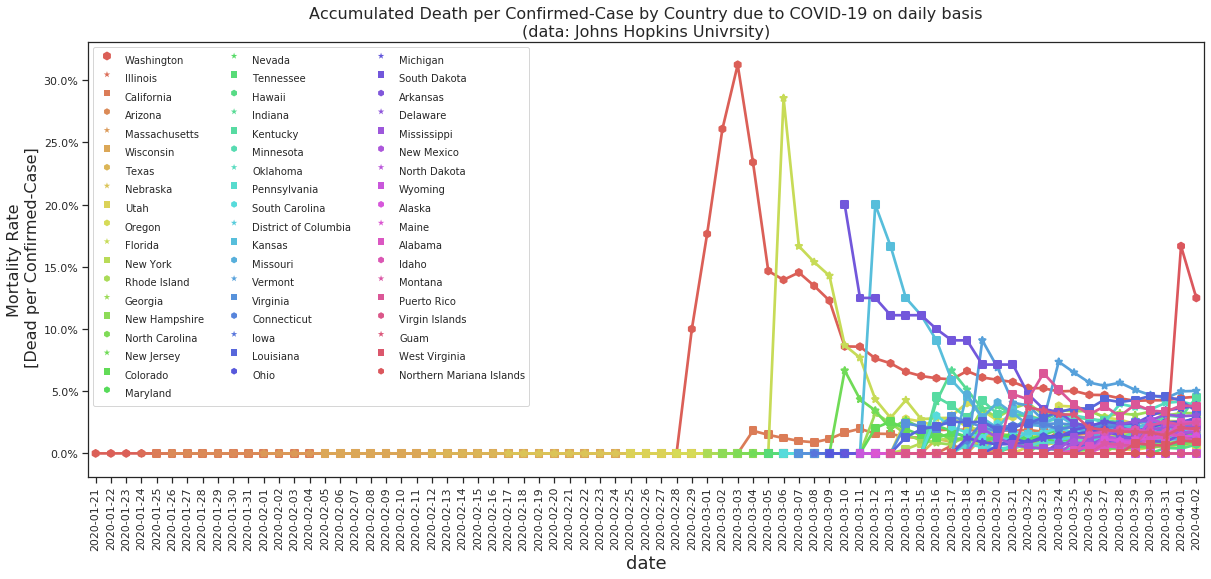

In [51]:
df = data_frames.loc[data_frames['date']>'2020-01-01']

plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)

plt.title('Accumulated Death per Confirmed-Case by Country due to COVID-19 on daily basis\n(data: Johns Hopkins Univrsity)', fontsize=16)
plot = sns.pointplot(x='date', y='dead_by_confirmed', hue='state', style=True, markers=marker_pool, data=df, palette=myPalette)
plt.xlabel('date', fontsize=18)
plt.ylabel('Mortality Rate\n [Dead per Confirmed-Case]', fontsize=16)
plot.legend(loc=2, prop={'size': 16})
plot.yaxis.set_major_formatter(mtick.PercentFormatter())
plot.set_xticklabels([t.get_text().split("T")[0] for t in plot.get_xticklabels()])
plt.legend(fontsize='small', ncol=3,handleheight=2.4, labelspacing=0.05)


display(plot)

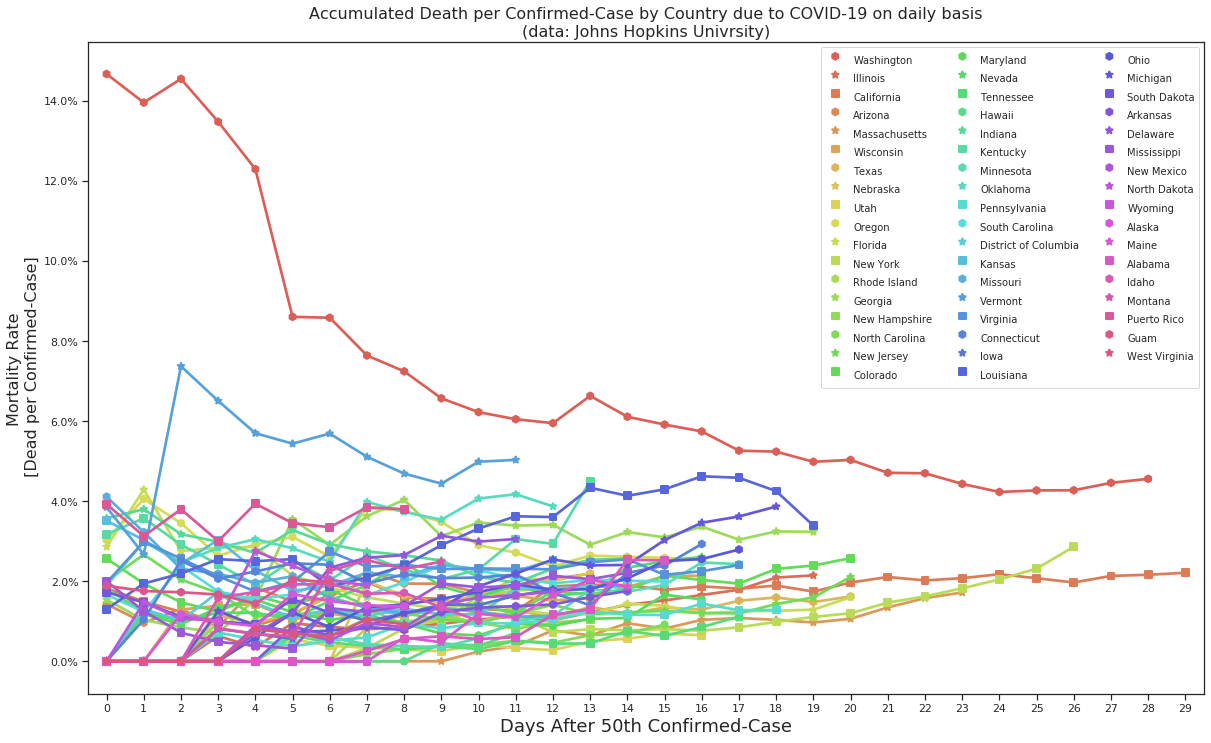

In [49]:
df = data_frames_indexed.loc[data_frames_indexed['date']>'2020-01-01']

plt.figure(figsize=(20, 12))
plt.xticks(rotation=0)

plt.title('Accumulated Death per Confirmed-Case by Country due to COVID-19 on daily basis\n(data: Johns Hopkins Univrsity)', fontsize=16)

plot = sns.pointplot(x='days_after_threshold', y='dead_by_confirmed', hue='state', style=True, markers=marker_pool, data=df, palette=myPalette)
plt.xlabel(threshold_str, fontsize=18)
plt.ylabel('Mortality Rate\n [Dead per Confirmed-Case]', fontsize=16)
plot.legend(loc=4, prop={'size': 16})
plot.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(fontsize='small', ncol=3,handleheight=2.4, labelspacing=0.05)

display(plot)

## Daily New Confirmed Cases by Country

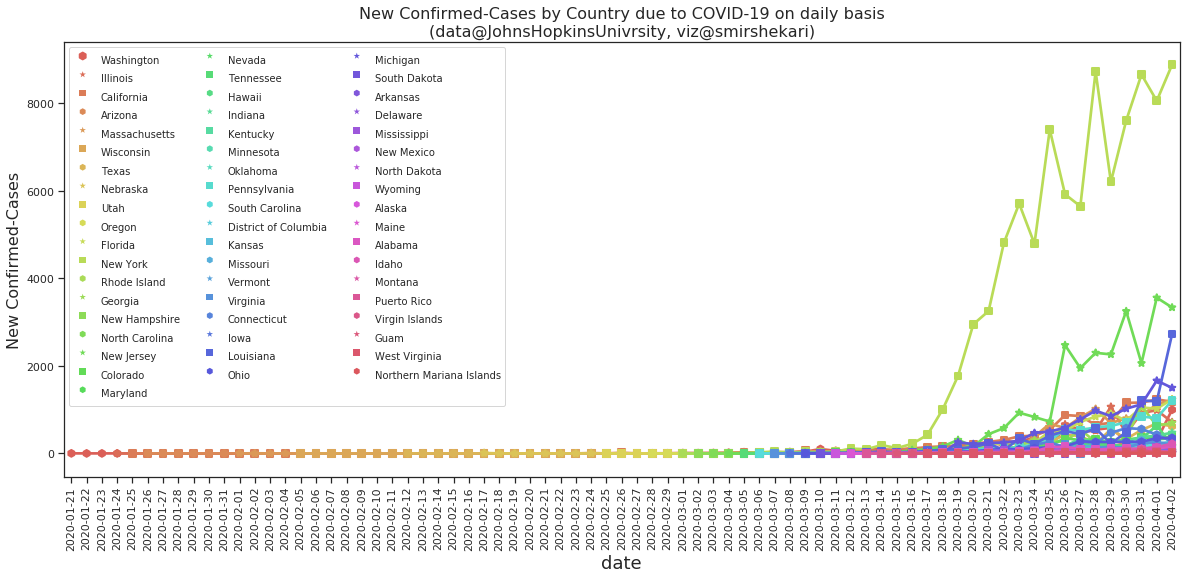

In [48]:
df = data_frames.loc[data_frames['date']>'2020-01-01']

plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)

plt.title('New Confirmed-Cases by Country due to COVID-19 on daily basis\n(data@JohnsHopkinsUnivrsity, viz@smirshekari)', fontsize=16)
plot = sns.pointplot(x='date', y='#new_confirmed', hue='state', style=True, markers=marker_pool, dashes=False, data=df, palette=myPalette)
plt.xlabel('date', fontsize=18)
plt.ylabel('New Confirmed-Cases', fontsize=16)
plot.legend(loc=2, prop={'size': 16})
plot.set_xticklabels([t.get_text().split("T")[0] for t in plot.get_xticklabels()])
plt.legend(fontsize='small', ncol=3,handleheight=2.4, labelspacing=0.05)

display(plot)

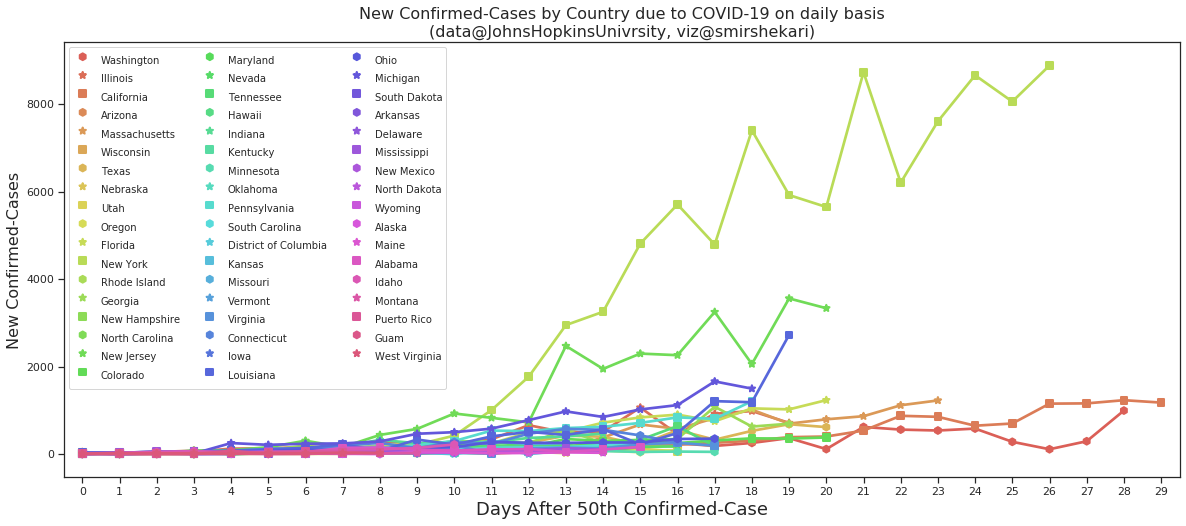

In [52]:
df = data_frames_indexed

plt.figure(figsize=(20, 8))
plt.xticks(rotation=0)

plt.title('New Confirmed-Cases by Country due to COVID-19 on daily basis\n(data@JohnsHopkinsUnivrsity, viz@smirshekari)', fontsize=16)
plot = sns.pointplot(x='days_after_threshold', y='#new_confirmed', hue='state', style=True, markers=marker_pool, dashes=False, data=df, palette=myPalette)
plt.xlabel(threshold_str, fontsize=18)
plt.ylabel('New Confirmed-Cases', fontsize=16)
plot.legend(loc=1, prop={'size': 16})
plt.legend(fontsize='small', ncol=3,handleheight=2.4, labelspacing=0.05)

display(plot)

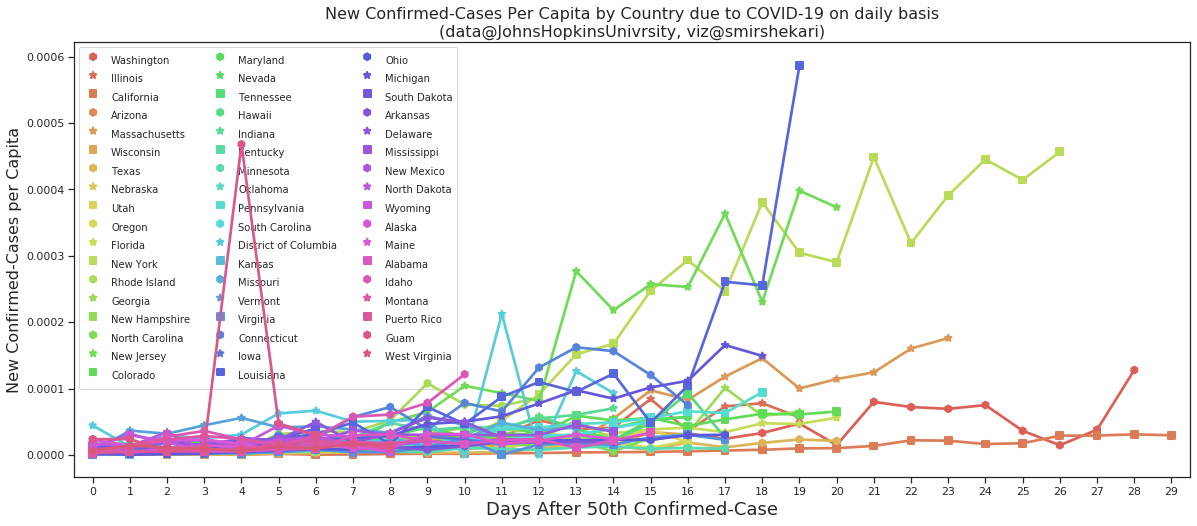

In [53]:
df = data_frames_indexed

plt.figure(figsize=(20, 8))
plt.xticks(rotation=0)

plt.title('New Confirmed-Cases Per Capita by Country due to COVID-19 on daily basis\n(data@JohnsHopkinsUnivrsity, viz@smirshekari)', fontsize=16)
plot = sns.pointplot(x='days_after_threshold', y='new_confirmed_per_capita', hue='state', style=True, markers=marker_pool, dashes=False, data=df, palette=myPalette)
plt.xlabel(threshold_str, fontsize=18)
plt.ylabel('New Confirmed-Cases per Capita', fontsize=16)
plot.legend(loc=1, prop={'size': 16})
plt.legend(fontsize='small', ncol=3,handleheight=2.4, labelspacing=0.05)

display(plot)

## Daily New Dead Cases by Country

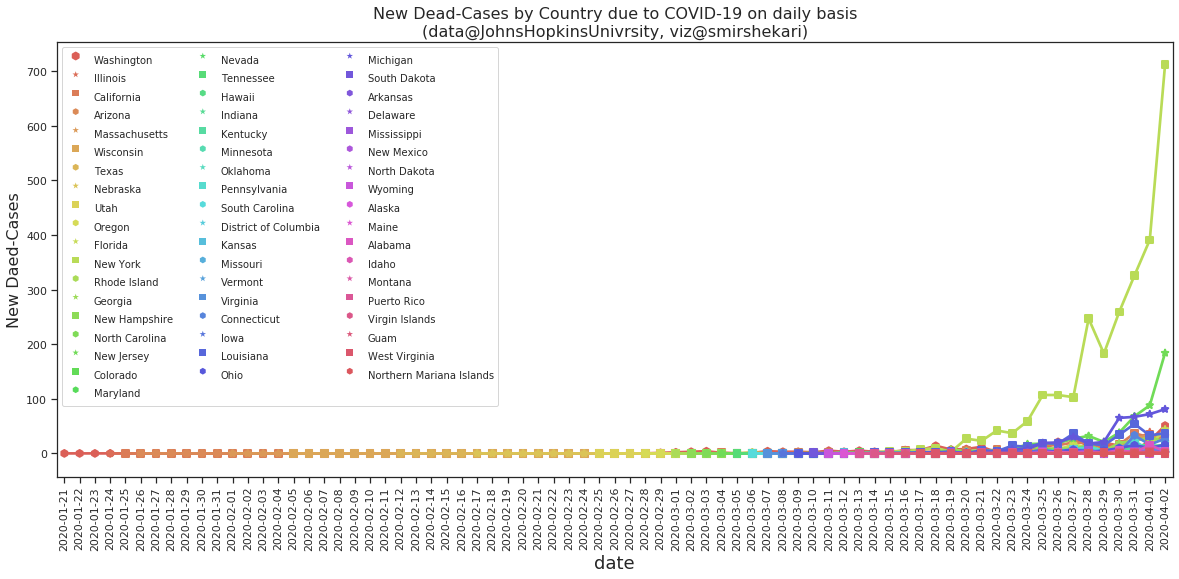

In [54]:
df = data_frames.loc[data_frames['date']>'2020-01-01']

plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)

plt.title('New Dead-Cases by Country due to COVID-19 on daily basis\n(data@JohnsHopkinsUnivrsity, viz@smirshekari)', fontsize=16)
plot = sns.pointplot(x='date', y='#new_dead', hue='state', style=True, markers=marker_pool, dashes=False, data=df, palette=myPalette)
plt.xlabel('date', fontsize=18)
plt.ylabel('New Daed-Cases', fontsize=16)
plot.legend(loc=2, prop={'size': 16})
plot.set_xticklabels([t.get_text().split("T")[0] for t in plot.get_xticklabels()])
plt.legend(fontsize='small', ncol=3,handleheight=2.4, labelspacing=0.05)


display(plot)

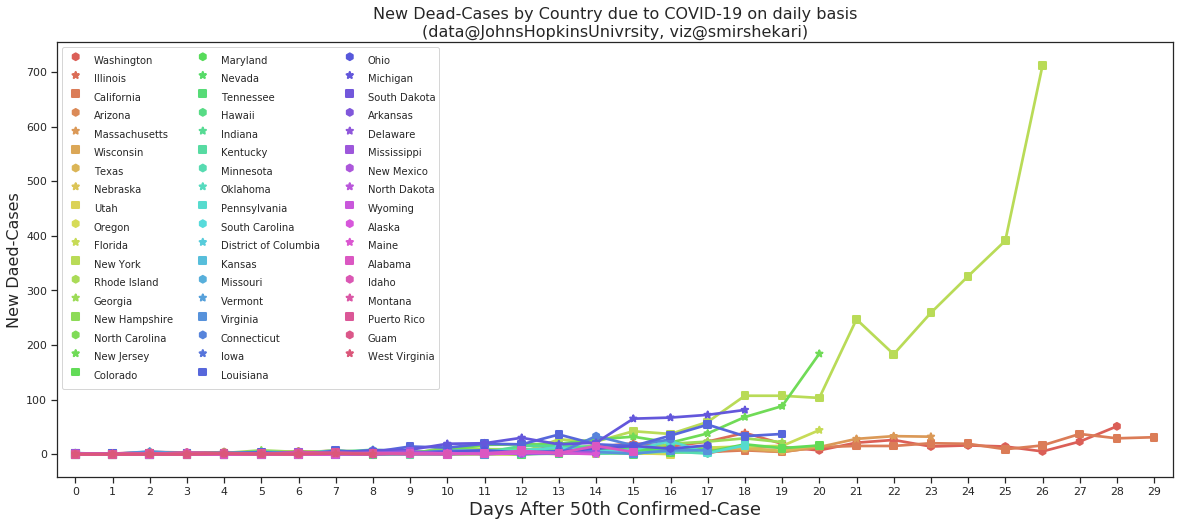

In [67]:
df = data_frames_indexed

plt.figure(figsize=(20, 8))
plt.xticks(rotation=0)

plt.title('New Dead-Cases by Country due to COVID-19 on daily basis\n(data@JohnsHopkinsUnivrsity, viz@smirshekari)', fontsize=16)
plot = sns.pointplot(x='days_after_threshold', y='#new_dead', hue='state', style=True, markers=marker_pool, dashes=False, data=df, palette=myPalette)
plt.xlabel(threshold_str, fontsize=18)
plt.ylabel('New Daed-Cases', fontsize=16)
plot.legend(loc=2, prop={'size': 16})
plt.legend(fontsize='small', ncol=3,handleheight=2.4, labelspacing=0.05)

display(plot)

## Accumulated Confirmed Cases by Country

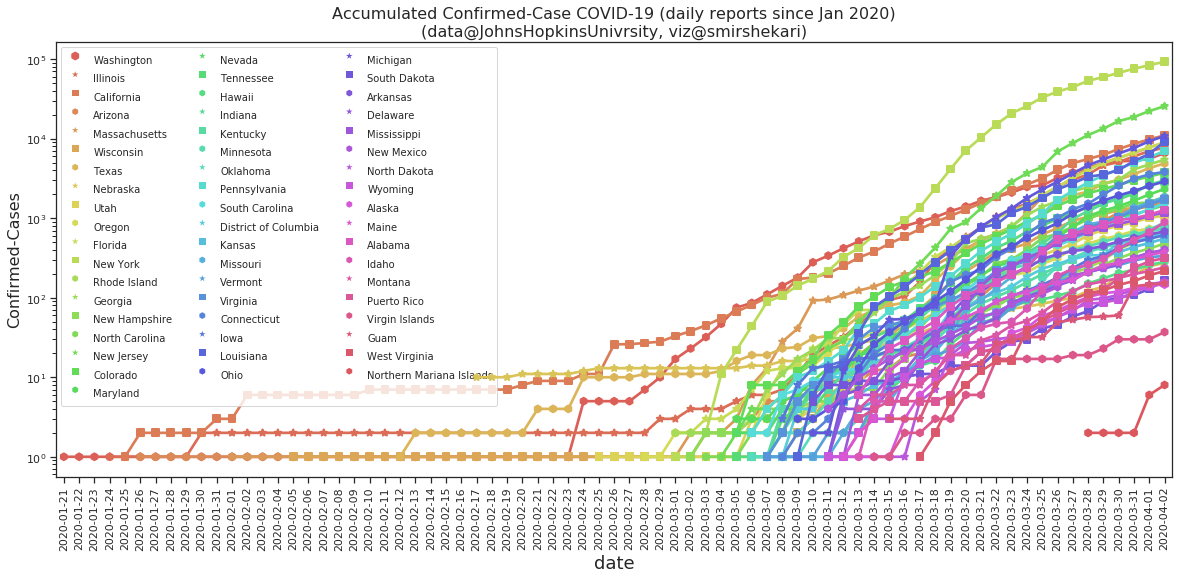

In [56]:
df = data_frames.loc[data_frames['date']>'2020-01-15']
df = df.dropna()

plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)

plt.title('Accumulated Confirmed-Case COVID-19 (daily reports since Jan 2020)\n(data@JohnsHopkinsUnivrsity, viz@smirshekari)', fontsize=16)
plot = sns.pointplot(x='date', y='cases', hue='state', style=True, markers=marker_pool, data=df, palette=myPalette)
plot.set_yscale('log')

plt.xlabel('date', fontsize=18)
plt.ylabel('Confirmed-Cases', fontsize=16)
plot.legend(loc=2, prop={'size': 16})
plot.set_xticklabels([t.get_text().split("T")[0] for t in plot.get_xticklabels()])
plt.legend(fontsize='small', ncol=3,handleheight=2.4, labelspacing=0.05)


display(plot)

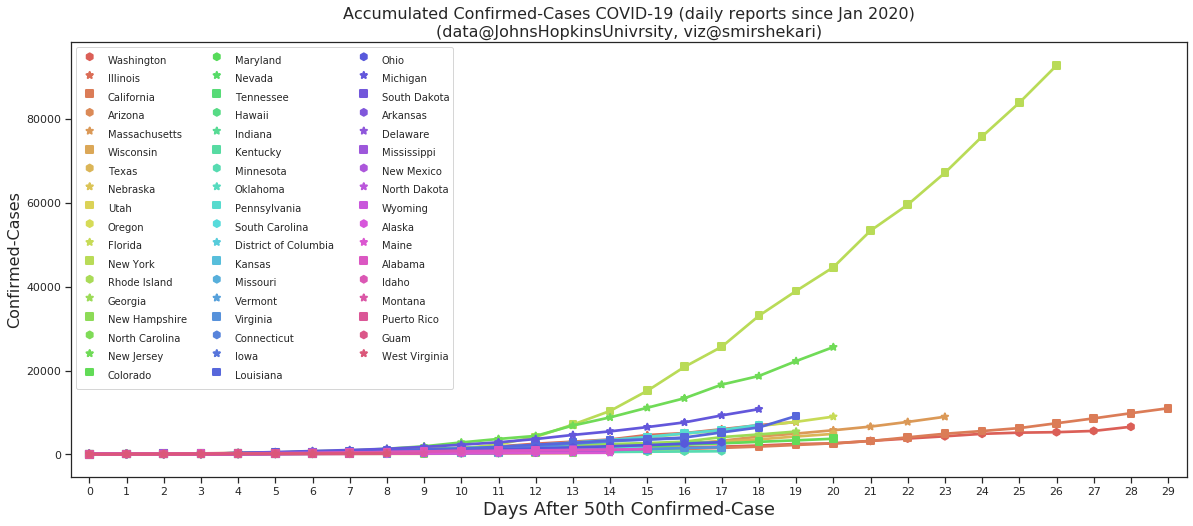

In [65]:
df = data_frames_indexed
df = df.dropna()

plt.figure(figsize=(20, 8))
plt.xticks(rotation=0)

plt.title('Accumulated Confirmed-Cases COVID-19 (daily reports since Jan 2020)\n(data@JohnsHopkinsUnivrsity, viz@smirshekari)', fontsize=16)
plot = sns.pointplot(x='days_after_threshold', y='cases', hue='state', style=True, markers=marker_pool, data=df, palette=myPalette)
# plot.set_yscale('log')

plt.xlabel(threshold_str, fontsize=18)
plt.ylabel('Confirmed-Cases', fontsize=16)
plot.legend(loc=4, prop={'size': 16})
plt.legend(fontsize='small', ncol=3,handleheight=2.4, labelspacing=0.05)

display(plot)



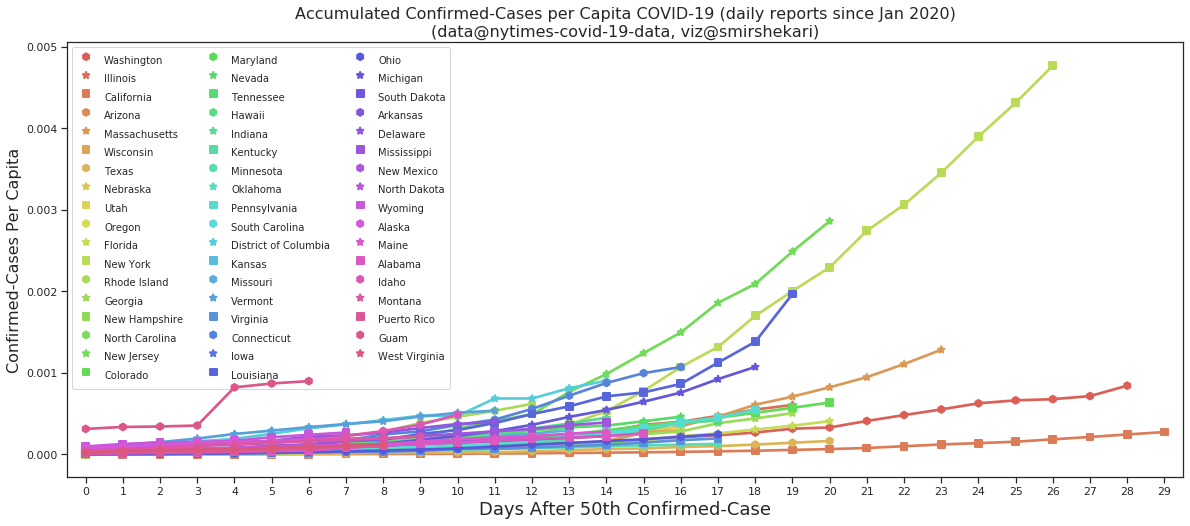

In [15]:
df = data_frames_indexed
df = df.dropna()

plt.figure(figsize=(20, 8))
plt.xticks(rotation=0)

plt.title('Accumulated Confirmed-Cases per Capita COVID-19 (daily reports since Jan 2020)\n(data@nytimes-covid-19-data, viz@smirshekari)', fontsize=16)
plot = sns.pointplot(x='days_after_threshold', y='confirmed_per_capita', hue='state', style=True, markers=marker_pool, data=df, palette=myPalette)
# plot.set_yscale('log')

plt.xlabel(threshold_str, fontsize=18)
plt.ylabel('Confirmed-Cases Per Capita', fontsize=16)
plot.legend(loc=2, prop={'size': 16})
plt.legend(fontsize='small', ncol=3,handleheight=2.4, labelspacing=0.05)

display(plot)

## Accumulated Dead Cases by Country

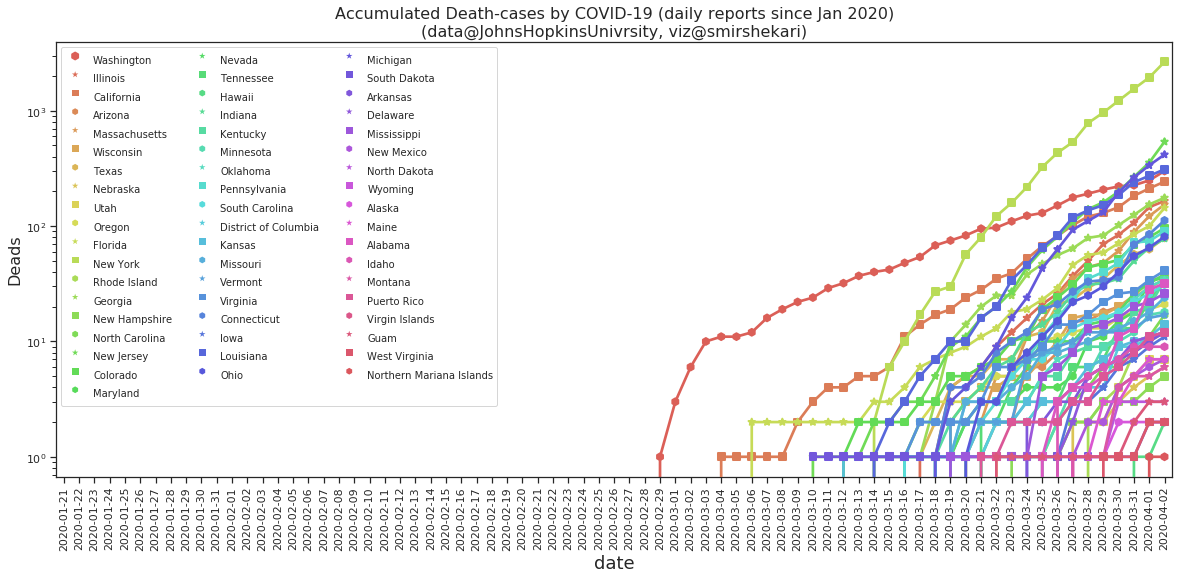

In [61]:
df = data_frames.loc[data_frames['date']>'2020-01-15']
df = df.dropna()

plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)

plt.title('Accumulated Death-cases by COVID-19 (daily reports since Jan 2020)\n(data@JohnsHopkinsUnivrsity, viz@smirshekari)', fontsize=16)
plot = sns.pointplot(x='date', y='deaths', hue='state', style=True, markers=marker_pool, data=df, palette=myPalette)
plot.set_yscale('log')

plt.xlabel('date', fontsize=18)
plt.ylabel('Deads', fontsize=16)
plot.legend(loc=2, prop={'size': 16})
plot.set_xticklabels([t.get_text().split("T")[0] for t in plot.get_xticklabels()])
plt.legend(fontsize='small', ncol=3,handleheight=2.4, labelspacing=0.05)


display(plot)

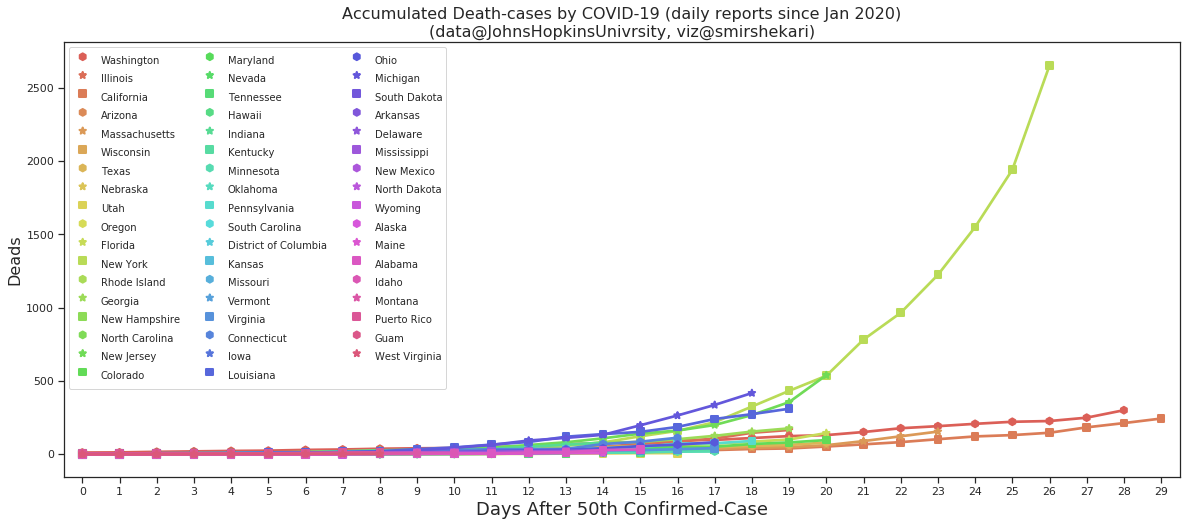

In [68]:
df = data_frames_indexed
df = df.dropna()

plt.figure(figsize=(20, 8))
plt.xticks(rotation=0)

plt.title('Accumulated Death-cases by COVID-19 (daily reports since Jan 2020)\n(data@JohnsHopkinsUnivrsity, viz@smirshekari)', fontsize=16)
plot = sns.pointplot(x='days_after_threshold', y='deaths', hue='state', style='state', markers=marker_pool, data=df, palette=myPalette)
# plot.set_yscale('log')

plt.xlabel(threshold_str, fontsize=18)
plt.ylabel('Deads', fontsize=16)
plot.legend(loc=2, prop={'size': 16})
plt.legend(fontsize='small', ncol=3,handleheight=2.4, labelspacing=0.05)

display(plot)

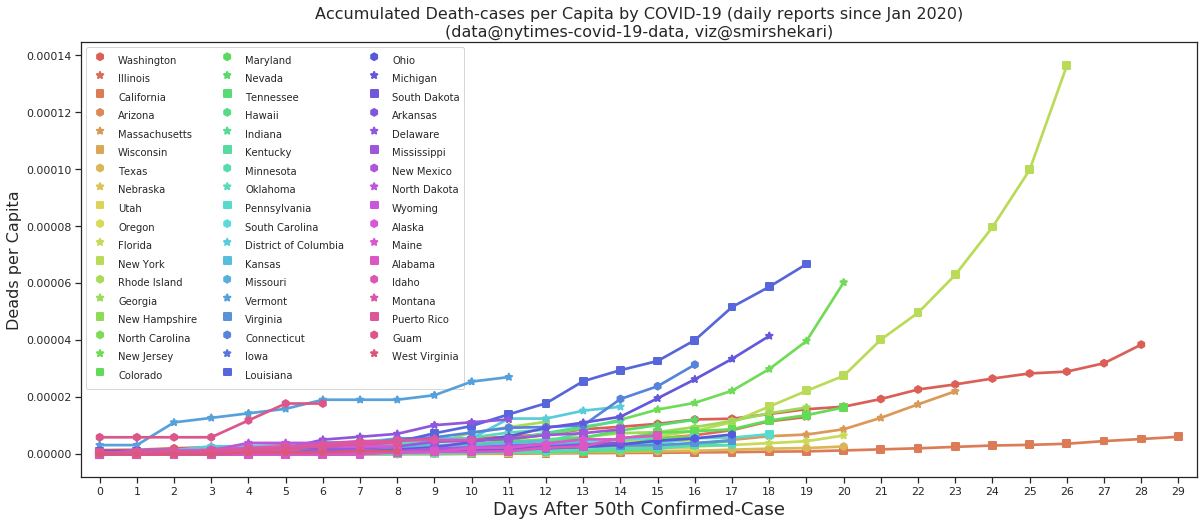

In [14]:
df = data_frames_indexed
df = df.dropna()

plt.figure(figsize=(20, 8))
plt.xticks(rotation=0)

plt.title('Accumulated Death-cases per Capita by COVID-19 (daily reports since Jan 2020)\n(data@nytimes-covid-19-data, viz@smirshekari)', fontsize=16)
plot = sns.pointplot(x='days_after_threshold', y='death_per_capita', hue='state', style='state', markers=marker_pool, data=df, palette=myPalette)
# plot.set_yscale('log')

plt.xlabel(threshold_str, fontsize=18)
plt.ylabel('Deads per Capita', fontsize=16)
plot.legend(loc=2, prop={'size': 16})
plt.legend(fontsize='small', ncol=3,handleheight=2.4, labelspacing=0.05)

display(plot)